In [237]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
import glob
import os

In [236]:
parent = "S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition"
files = glob.glob(parent + "/*/dev662_demods_[0-9]_sample_00000.csv")
files

['S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact3_2_ethanol_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_1_001\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_2_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_2_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_2_2_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_2_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_1_000\\dev662_demods_0_sample_000

In [ ]:
# In Contact: chunk = 1, idx = 3, guess = (.001, 1e2, 35.15e3*2*np.pi, 1e3)
# In Contact: chunk = 1, idx = 6, guess = (.001, 1e2, 35.15e3*2*np.pi, 1e3)
# In Contact: chunk = 0, idx = 8, guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)

# NOT Contact: chunk = 1, idx = 5, guess = (.015, 1e4, 32.78e3*2*np.pi, 1)

In [489]:
chunk = 1
idx = 5
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

Using data from S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\sweep_noncontact_2_000.


Exctracting chunk 1 from file S:\UsersData\Martin\2018\12_Dec\10\qtf_deposition\sweep_noncontact_2_000\dev662_demods_0_sample_00000.csv.
Experiment time: 10/12/2018 10:08, # of points: 500


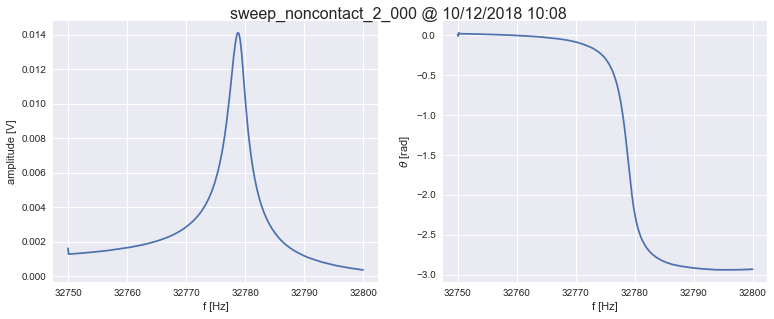

In [490]:
data, date = io.load_data_lockin(datadir, file, chunk)
plots.plot_lockin(data, date = date, name = datadir.split("\\")[-1],
                  keys = list(zip(2*["frequency"], ["r", "phase"])))

In [417]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

from sicm import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Expecting 4 paramters in fit.
Fitting Fitter.lorentzian_fun to 500 datapoints ...
Found parameters: [1.41301920e-02 1.16064981e+04 2.05955208e+05 4.96515402e+02]
Finished in 0.003 s


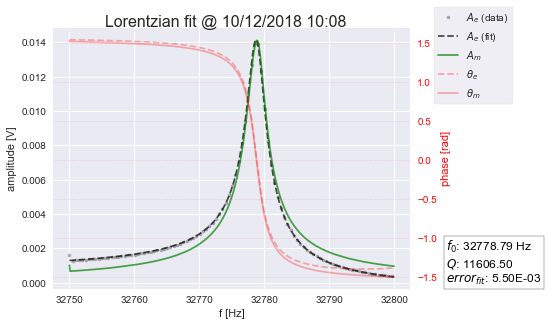

In [491]:
# TODO: add selction of frequency range
# TODO: For verly low-Q oscillators, the f0 shifts. Is this to be expected?

guess = (.015, 1e4, 32.78e3*2*np.pi, 1)
# guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)
fitter = analysis.Fitter([data["frequency"], data["r"], data["phase"]+np.pi/2],
                         guess, date)
fitter.process()

-------
## Not used anymore

32786.0

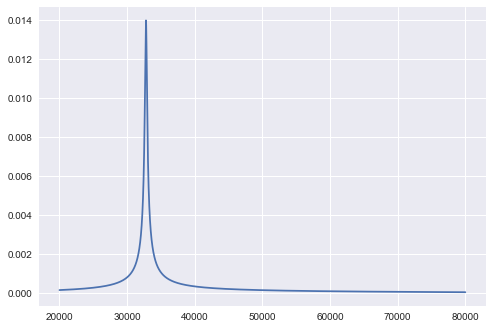

In [152]:
import matplotlib.pyplot as plt
import numpy as np
xx = np.arange(2e4, 8e4)
# xx = data["frequency"]
yy = analysis.Fitter.lorentzian_fun(xx, *(.014, 1e2, 20.6e4, .1))
plt.plot(xx, yy)
xx[np.argmax(yy)]